In [27]:
# --- Standard libraries
import re
import json
import pickle as pkl
import numpy as np
from tabulate import tabulate
# --- RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
# --- Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### Coronene

#### Load data

In [28]:
# --- Load data from json file into dictionary
with open('./raw/data_coronene.json', 'rb') as file:
    dict = json.load(file)

In [29]:
dict[0]

{'R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_3_2': 'c12[c:4]3[c:6]4[c:7]([H:29])[c:9]([H:30])[c:10]5[c:8]3[c:12]3[c:16]6[c:20]1[C:22]1([C:21]([H:36])=[C:19]([H:37])[C:18]6=[C:17]([H:40])[C:15]([H:38])([H:39])[C:14]36[C:13]([H:32])([C:11]5([H:31])[H:35])[O:26]6)[C:23]([H:33])([C:1]([H:27])([H:34])[C:2]23[C:3]([H:28])([C:5]4([H:41])[H:42])[O:24]3)[O:25]1',
 'R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_1_ieEPOXY_1_1': 'c12[c:2]3[c:1]([H:26])[c:23]([H:37])[c:22]4[c:20]1[c:16]1[c:18]([c:19]([H:35])[c:21]4[H:36])[C:17]([H:34])=[C:15]([H:33])[C:14]4=[C:13]([H:32])[C:11]([H:31])([H:39])[C:10]56[C:8]7([c:4]2[c:6]([c:5]([H:28])[c:3]3[H:27])[C:7]([H:29])([H:38])[C:9]5([H:30])[O:25]6)[C:12]41[O:24]7',
 'R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_1_ieEPOXY_4_1': 'C12([H:44])[C:2]34[C:1]([H:29])([C:23]([H:40])([H:43])[C:22]56[C:20]1([C:16]1=[C:12]7[C:8]8=[C:4]2[C:6](=[C:7]([H:32])[C:9]([H:33])([H:41])[C:10]82[C:11]([H:34])([C:13]8([H:35])[C:14]7([C:15]([H:36

In [30]:
# --- Get the name IDs for all molecules
ids = list(dict[0].keys())
# --- First molecule name ID in list
name = ids[21]
print(name)

R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_1_iEPOXY_3_ieEPOXY_0_1


In [31]:
# --- First item in list is dictionary of mol names and SMILES
print(dict[0][name])

C123[C:2]4=[C:1]([H:42])[C:23]([H:40])([H:41])[C:22]56[C:20]1([C:16]17[C:12]8([C:8]9([H:37])[C:4]2([C:6](=[C:5]([H:29])[C:3]4=[O:24])[C:7]([H:30])=[C:9]([H:31])[C:10]9([O:26][H:36])[C:11]([H:32])=[C:13]([H:33])[C:14]8=[C:15]([H:34])[C:17]([H:35])=[C:18]1[C:19]([H:38])=[C:21]5[H:39])[O:25]3)[O:27]7)[O:28]6


In [32]:
# --- Second item is individual atom spectra dictionary of mol name
spec = dict[1][name]
# --- with each key being the atom index
print(spec.keys())

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25'])


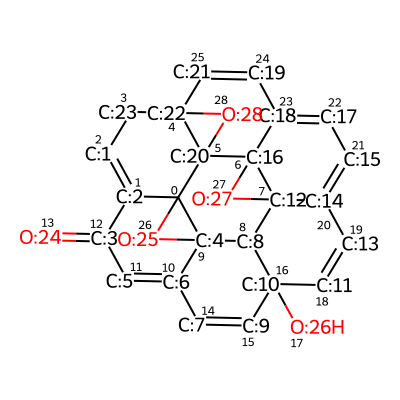

In [33]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
IPythonConsole.molSize = 400,400
# --- Show the molecule with RDKit
mol = Chem.MolFromSmiles(dict[0][name])
mol

<function matplotlib.pyplot.show(close=None, block=None)>

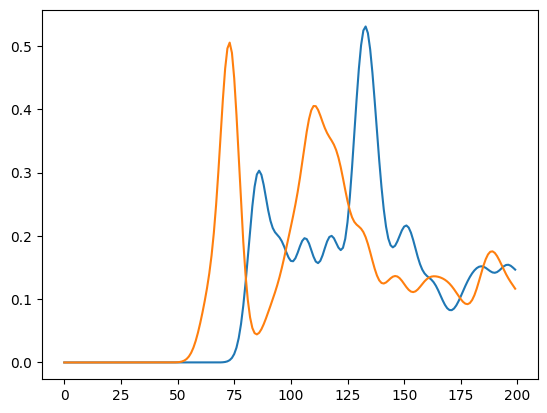

In [34]:
# --- Plot carbons of similar environment
# --- Dictionary numbers correspond to the RDKit atom indexes
plt.plot(dict[1][name]['0'])
plt.plot(dict[1][name]['6'])
#plt.plot(dict[1][name]['23'])
plt.show


#### View data statistics

In [35]:
num = 0

for i in ids:
    for key in dict[1][i]:
        if max(dict[1][i][key]) > num:
            num = max(dict[1][i][key])

print(num)

1.0


In [36]:
atoms = 0
# --- Array features (hybridization, number of Hs, aromatic, ring)
features = np.zeros([4, 2, 3, 2, 2])

# --- Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6: # or atom.GetAtomicNum() == 8:
            atoms += 1
            if atom.GetDegree() == 1:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 0, 0, 0] += 1
                            else:
                                features[0, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 0, 1, 0] += 1
                            else:
                                features[0, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 1, 0, 0] += 1
                            else:
                                features[0, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 1, 1, 0] += 1
                            else:
                                features[0, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 2, 0, 0] += 1
                            else:
                                features[0, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 2, 1, 0] += 1
                            else:
                                features[0, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 0, 0, 0] += 1
                            else:
                                features[0, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 0, 1, 0] += 1
                            else:
                                features[0, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 1, 0, 0] += 1
                            else:
                                features[0, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 1, 1, 0] += 1
                            else:
                                features[0, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 2, 0, 0] += 1
                            else:
                                features[0, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 2, 1, 0] += 1
                            else:
                                features[0, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 2:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 0, 0, 0] += 1
                            else:
                                features[1, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 0, 1, 0] += 1
                            else:
                                features[1, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 1, 0, 0] += 1
                            else:
                                features[1, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 1, 1, 0] += 1
                            else:
                                features[1, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 2, 0, 0] += 1
                            else:
                                features[1, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 2, 1, 0] += 1
                            else:
                                features[1, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 0, 0, 0] += 1
                            else:
                                features[1, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 0, 1, 0] += 1
                            else:
                                features[1, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 1, 0, 0] += 1
                            else:
                                features[1, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 1, 1, 0] += 1
                            else:
                                features[1, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 2, 0, 0] += 1
                            else:
                                features[1, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 2, 1, 0] += 1
                            else:
                                features[1, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 3:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 0, 0, 0] += 1
                            else:
                                features[2, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 0, 1, 0] += 1
                            else:
                                features[2, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 1, 0, 0] += 1
                            else:
                                features[2, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 1, 1, 0] += 1
                            else:
                                features[2, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 2, 0, 0] += 1
                            else:
                                features[2, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 2, 1, 0] += 1
                            else:
                                features[2, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 0, 0, 0] += 1
                            else:
                                features[2, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 0, 1, 0] += 1
                            else:
                                features[2, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 1, 0, 0] += 1
                            else:
                                features[2, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 1, 1, 0] += 1
                            else:
                                features[2, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 2, 0, 0] += 1
                            else:
                                features[2, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 2, 1, 0] += 1
                            else:
                                features[2, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 4:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 0, 0, 0] += 1
                            else:
                                features[3, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 0, 1, 0] += 1
                            else:
                                features[3, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 1, 0, 0] += 1
                            else:
                                features[3, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 1, 1, 0] += 1
                            else:
                                features[3, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 2, 0, 0] += 1
                            else:
                                features[3, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 2, 1, 0] += 1
                            else:
                                features[3, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 0, 0, 0] += 1
                            else:
                                features[3, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 0, 1, 0] += 1
                            else:
                                features[3, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 1, 0, 0] += 1
                            else:
                                features[3, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 1, 1, 0] += 1
                            else:
                                features[3, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 2, 0, 0] += 1
                            else:
                                features[3, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 2, 1, 0] += 1
                            else:
                                features[3, 1, 2, 1, 1] += 1



In [37]:
print(f'Total number of carbons = {atoms:.0f}')
print('---')
print('Degree')
print(f'1 = {np.sum(features[0, :, :, :, :]):.0f}')
print(f'2 = {np.sum(features[1, :, :, :, :]):.0f}')
print(f'3 = {np.sum(features[2, :, :, :, :]):.0f}')
print(f'4 = {np.sum(features[3, :, :, :, :]):.0f}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, :, 0, :, :]):.0f}')
print(f'1 Hs = {np.sum(features[:, :, 1, :, :]):.0f}')
print(f'2 Hs = {np.sum(features[:, :, 2, :, :]):.0f}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP2 = {np.sum(features[:, 0, :, :, :]):.0f}')
print(f'SP3 = {np.sum(features[:, 1, :, :, :]):.0f}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, :, 0, :]):.0f}')
print(f'False = {np.sum(features[:, :, :, 1, :]):.0f}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, :, 0]):.0f}')
print(f'False = {np.sum(features[:, :, :, :, 1]):.0f}')

Total number of carbons = 7895
---
Degree
1 = 0
2 = 2677
3 = 4558
4 = 660
---
Number of hydrogens bonded to carbon:
0 Hs = 4479
1 Hs = 3130
2 Hs = 286
---
Hybridisation of carbon:
SP2 = 6210
SP3 = 1685
---
Numer of aromatic carbons:
True = 3668
False = 4227
---
Is carbon in a ring:
True = 7608
False = 287


In [38]:
print(tabulate(
    [['Aromatic', features[0, 0, 0, 0, 0], features[0, 0, 0, 0, 1], 'Aromatic', features[0, 0, 1, 0, 0], features[0, 0, 1, 0, 1], 'Aromatic', features[0, 0, 2, 0, 0], features[0, 0, 2, 0, 1]],
    ['Non Aromatic', features[0, 0, 0, 1, 0], features[0, 0, 0, 1, 1], 'Non Aromatic', features[0, 0, 1, 1, 0], features[0, 0, 1, 1, 1], 'Non Aromatic', features[0, 0, 2, 1, 0], features[0, 0, 2, 1, 1]]],
    headers=['Deg 1, 0H, SP2', 'Ring', 'Not Ring', 'Deg 1, 1H, SP2', 'Ring', 'Not Ring', 'Deg 1, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[0, 1, 0, 0, 0], features[0, 1, 0, 0, 1], 'Aromatic', features[0, 1, 1, 0, 0], features[0, 1, 1, 0, 1], 'Aromatic', features[0, 1, 2, 0, 0], features[0, 1, 2, 0, 1]],
    ['Non Aromatic', features[0, 1, 0, 1, 0], features[0, 1, 0, 1, 1], 'Non Aromatic', features[0, 1, 1, 1, 0], features[0, 1, 1, 1, 1], 'Non Aromatic', features[0, 1, 2, 1, 0], features[0, 1, 2, 1, 1]]],
    headers=['Deg 1, 0H, SP3', 'Ring', 'Not Ring', 'Deg 1, 1H, SP3', 'Ring', 'Not Ring', 'Deg 1, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0, 0], features[1, 0, 0, 0, 1], 'Aromatic', features[1, 0, 1, 0, 0], features[1, 0, 1, 0, 1], 'Aromatic', features[1, 0, 2, 0, 0], features[1, 0, 2, 0, 1]],
    ['Non Aromatic', features[1, 0, 0, 1, 0], features[1, 0, 0, 1, 1], 'Non Aromatic', features[1, 0, 1, 1, 0], features[1, 0, 1, 1, 1], 'Non Aromatic', features[1, 0, 2, 1, 0], features[1, 0, 2, 1, 1]]],
    headers=['Deg 2, 0H, SP2', 'Ring', 'Not Ring', 'Deg 2, 1H, SP2', 'Ring', 'Not Ring', 'Deg 2, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0, 0], features[1, 1, 0, 0, 1], 'Aromatic', features[1, 1, 1, 0, 0], features[1, 1, 1, 0, 1], 'Aromatic', features[1, 1, 2, 0, 0], features[1, 1, 2, 0, 1]],
    ['Non Aromatic', features[1, 1, 0, 1, 0], features[1, 1, 0, 1, 1], 'Non Aromatic', features[1, 1, 1, 1, 0], features[1, 1, 1, 1, 1], 'Non Aromatic', features[1, 1, 2, 1, 0], features[1, 1, 2, 1, 1]]],
    headers=['Deg 2, 0H, SP3', 'Ring', 'Not Ring', 'Deg 2, 1H, SP3', 'Ring', 'Not Ring', 'Deg 2, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[2, 0, 0, 0, 0], features[2, 0, 0, 0, 1], 'Aromatic', features[2, 0, 1, 0, 0], features[2, 0, 1, 0, 1], 'Aromatic', features[2, 0, 2, 0, 0], features[2, 0, 2, 0, 1]],
    ['Non Aromatic', features[2, 0, 0, 1, 0], features[2, 0, 0, 1, 1], 'Non Aromatic', features[2, 0, 1, 1, 0], features[2, 0, 1, 1, 1], 'Non Aromatic', features[2, 0, 2, 1, 0], features[2, 0, 2, 1, 1]]],
    headers=['Deg 3, 0H, SP2', 'Ring', 'Not Ring', 'Deg 3, 1H, SP2', 'Ring', 'Not Ring', 'Deg 3, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 1, 0, 0, 0], features[2, 1, 0, 0, 1], 'Aromatic', features[2, 1, 1, 0, 0], features[2, 1, 1, 0, 1], 'Aromatic', features[2, 1, 2, 0, 0], features[2, 1, 2, 0, 1]],
    ['Non Aromatic', features[2, 1, 0, 1, 0], features[2, 1, 0, 1, 1], 'Non Aromatic', features[2, 1, 1, 1, 0], features[2, 1, 1, 1, 1], 'Non Aromatic', features[2, 1, 2, 1, 0], features[2, 1, 2, 1, 1]]],
    headers=['Deg 3, 0H, SP3', 'Ring', 'Not Ring', 'Deg 3, 1H, SP3', 'Ring', 'Not Ring', 'Deg 3, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[3, 0, 0, 0, 0], features[3, 0, 0, 0, 1], 'Aromatic', features[3, 0, 1, 0, 0], features[3, 0, 1, 0, 1], 'Aromatic', features[3, 0, 2, 0, 0], features[3, 0, 2, 0, 1]],
    ['Non Aromatic', features[3, 0, 0, 1, 0], features[3, 0, 0, 1, 1], 'Non Aromatic', features[3, 0, 1, 1, 0], features[3, 0, 1, 1, 1], 'Non Aromatic', features[3, 0, 2, 1, 0], features[3, 0, 2, 1, 1]]],
    headers=['Deg 4, 0H, SP2', 'Ring', 'Not Ring', 'Deg 4, 1H, SP2', 'Ring', 'Not Ring', 'Deg 4, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[3, 1, 0, 0, 0], features[3, 1, 0, 0, 1], 'Aromatic', features[3, 1, 1, 0, 0], features[3, 1, 1, 0, 1], 'Aromatic', features[3, 1, 2, 0, 0], features[3, 1, 2, 0, 1]],
    ['Non Aromatic', features[3, 1, 0, 1, 0], features[3, 1, 0, 1, 1], 'Non Aromatic', features[3, 1, 1, 1, 0], features[3, 1, 1, 1, 1], 'Non Aromatic', features[3, 1, 2, 1, 0], features[3, 1, 2, 1, 1]]],
    headers=['Deg 4, 0H, SP3', 'Ring', 'Not Ring', 'Deg 4, 1H, SP3', 'Ring', 'Not Ring', 'Deg 4, 2H, SP3', 'Ring', 'Not Ring']
))

Deg 1, 0H, SP2      Ring    Not Ring  Deg 1, 1H, SP2      Ring    Not Ring  Deg 1, 2H, SP2      Ring    Not Ring
----------------  ------  ----------  ----------------  ------  ----------  ----------------  ------  ----------
Aromatic               0           0  Aromatic               0           0  Aromatic               0           0
Non Aromatic           0           0  Non Aromatic           0           0  Non Aromatic           0           0

Deg 1, 0H, SP3      Ring    Not Ring  Deg 1, 1H, SP3      Ring    Not Ring  Deg 1, 2H, SP3      Ring    Not Ring
----------------  ------  ----------  ----------------  ------  ----------  ----------------  ------  ----------
Aromatic               0           0  Aromatic               0           0  Aromatic               0           0
Non Aromatic           0           0  Non Aromatic           0           0  Non Aromatic           0           0


Deg 2, 0H, SP2      Ring    Not Ring  Deg 2, 1H, SP2      Ring    Not Ring  Deg 2, 2H, SP2   

In [39]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# --- Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    # --- Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # --- Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [40]:
print(f'Total number of bonds = {bonds:.0f}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :]):.0f}')
print(f'Double = {np.sum(b_features[1, :, :]):.0f}')
print(f'Aromatic = {np.sum(b_features[2, :, :]):.0f}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :]):.0f}')
print(f'False = {np.sum(b_features[:, 1, :]):.0f}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0]):.0f}')
print(f'False = {np.sum(b_features[:, :, 1]):.0f}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 11885
---
Number of types of bond:
Single = 6125
Double = 1572
Aromatic = 4188
---
Is bond conjugated:
True = 7353
False = 4532
---
Is bond in a ring:
True = 10534
False = 1351

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1043         663
Non Conjugated    4189         230
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1038         421
Non Conjugated      76          37
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        4188           0
Non Conjugated       0           0


In [15]:
import collections

test_dict = collections.defaultdict(list)

for i in ids:
    smiles = dict[0][i][0]
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    # --- Search through all atoms in molecule
    for atom in mol.GetAtoms():
        # --- Identify all carbons in molecule
        if atom.GetAtomicNum() == 6:
            # --- Look at the neighbouring atoms of carbon
            c_neigh = atom.GetNeighbors()
            # --- Identify carbons bonded to an oxygen
            for cn in c_neigh:
                if cn.GetAtomicNum() == 8:
                    # --- Get neighbours of the oxygen
                    o_neigh = cn.GetNeighbors()
                    # --- Look through O neighbours and identify if bonded to H
                    for on in o_neigh:
                        if on.GetAtomicNum() == 1:
                            test_dict[i].append(atom.GetIdx())
    

[12:34:50] non-ring atom 0 marked aromatic


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)

### Circumcoronene

#### Load Data

In [41]:
# --- Load data from json file into dictionary
with open('raw/data_circumcoronene.json', 'rb') as file:
    dict = json.load(file)

In [42]:
# --- Get the name IDs for all molecules
ids = list(dict[0].keys())
# --- First molecule name ID in list
name = 'cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_2'
print(name)

cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_2


In [43]:
# --- First item in list is dictionary of mol names and SMILES
print(dict[0][name])

c12[c:1]3[c:2]4[c:3]([c:4]([H:61])[c:5]1[H:62])[c:38]([H:67])[c:39]1[c:40]5[c:9]4[c:8]4[c:7]6[c:6]3[c:24]3[c:23]([c:31]([H:75])[c:32]([C:56](=[O:60])[H:74])[c:33]7[c:25]3[c:26]3[c:10]6[c:11]6[c:12]8[c:13]4[c:42]4[c:41]5[c:49]([c:48]([H:82])[c:47]1[H:69])[c:50]([H:81])[c:51]1[c:43]4[c:44]4[c:17]8[c:16]5[c:15]8[c:14]6[c:28]6[c:27]3[C:35]([C:55](=[O:59])[H:71])([C:34]7([H:72])[H:73])[C:36]([H:66])=[C:37]([C:54](=[O:57])[O:58][H:70])[c:29]6[c:30]([H:78])[c:18]8[c:19]([H:63])[c:20]([H:64])[c:21]5[C:46]([H:68])([H:77])[c:45]4[c:53]([H:79])[c:52]1[H:80])[C:22]2([H:65])[H:76]


In [44]:
# --- Second item is individual atom spectra dictionary of mol name
spec = dict[1][name]
# --- with each key being the atom index
print(spec.keys())

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60'])


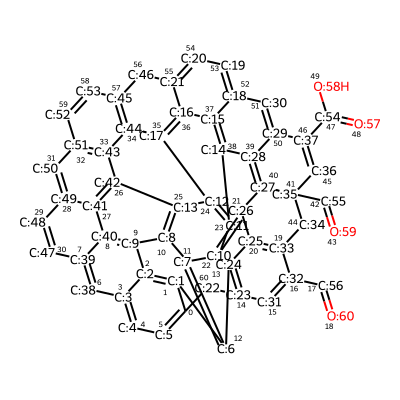

In [45]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
IPythonConsole.molSize = 400,400
# --- Show the molecule with RDKit
mol = Chem.MolFromSmiles(dict[0][name])
mol

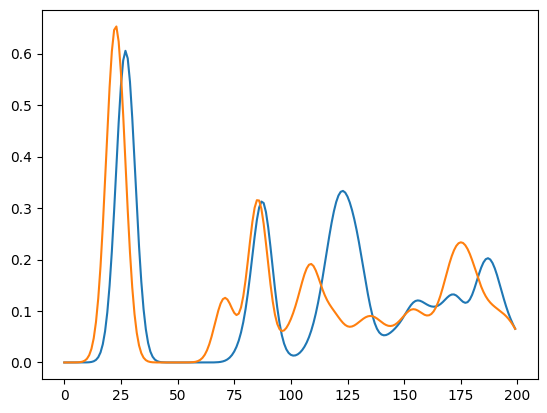

In [46]:
# --- Plot the spectra with the old dictionary keys
# --- which correspond to the atom map number C#
plt.plot(spec['17'])
plt.plot(spec['42'])
# plt.plot(spec['59'])
plt.show()

In [47]:
num = 0

for i in ids:
    for key in dict[1][i]:
        if max(dict[1][i][key]) > num:
            num = max(dict[1][i][key])

print(num)

1.0


#### View data statistics

In [48]:
atoms = 0
features = np.zeros([4, 2, 3, 2, 2])

# --- Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6: # or atom.GetAtomicNum() == 8:
            atoms += 1
            if atom.GetDegree() == 1:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 0, 0, 0] += 1
                            else:
                                features[0, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 0, 1, 0] += 1
                            else:
                                features[0, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 1, 0, 0] += 1
                            else:
                                features[0, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 1, 1, 0] += 1
                            else:
                                features[0, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 2, 0, 0] += 1
                            else:
                                features[0, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 2, 1, 0] += 1
                            else:
                                features[0, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 0, 0, 0] += 1
                            else:
                                features[0, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 0, 1, 0] += 1
                            else:
                                features[0, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 1, 0, 0] += 1
                            else:
                                features[0, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 1, 1, 0] += 1
                            else:
                                features[0, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 2, 0, 0] += 1
                            else:
                                features[0, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 2, 1, 0] += 1
                            else:
                                features[0, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 2:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 0, 0, 0] += 1
                            else:
                                features[1, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 0, 1, 0] += 1
                            else:
                                features[1, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 1, 0, 0] += 1
                            else:
                                features[1, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 1, 1, 0] += 1
                            else:
                                features[1, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 2, 0, 0] += 1
                            else:
                                features[1, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 2, 1, 0] += 1
                            else:
                                features[1, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 0, 0, 0] += 1
                            else:
                                features[1, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 0, 1, 0] += 1
                            else:
                                features[1, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 1, 0, 0] += 1
                            else:
                                features[1, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 1, 1, 0] += 1
                            else:
                                features[1, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 2, 0, 0] += 1
                            else:
                                features[1, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 2, 1, 0] += 1
                            else:
                                features[1, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 3:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 0, 0, 0] += 1
                            else:
                                features[2, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 0, 1, 0] += 1
                            else:
                                features[2, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 1, 0, 0] += 1
                            else:
                                features[2, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 1, 1, 0] += 1
                            else:
                                features[2, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 2, 0, 0] += 1
                            else:
                                features[2, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 2, 1, 0] += 1
                            else:
                                features[2, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 0, 0, 0] += 1
                            else:
                                features[2, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 0, 1, 0] += 1
                            else:
                                features[2, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 1, 0, 0] += 1
                            else:
                                features[2, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 1, 1, 0] += 1
                            else:
                                features[2, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 2, 0, 0] += 1
                            else:
                                features[2, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 2, 1, 0] += 1
                            else:
                                features[2, 1, 2, 1, 1] += 1
            elif atom.GetDegree() == 4:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 0, 0, 0] += 1
                            else:
                                features[3, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 0, 1, 0] += 1
                            else:
                                features[3, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 1, 0, 0] += 1
                            else:
                                features[3, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 1, 1, 0] += 1
                            else:
                                features[3, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 2, 0, 0] += 1
                            else:
                                features[3, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 2, 1, 0] += 1
                            else:
                                features[3, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 0, 0, 0] += 1
                            else:
                                features[3, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 0, 1, 0] += 1
                            else:
                                features[3, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 1, 0, 0] += 1
                            else:
                                features[3, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 1, 1, 0] += 1
                            else:
                                features[3, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 2, 0, 0] += 1
                            else:
                                features[3, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 2, 1, 0] += 1
                            else:
                                features[3, 1, 2, 1, 1] += 1

In [49]:
print(f'Total number of carbons = {atoms:.0f}')
print('---')
print('Degree of atom:')
print(f'1 = {np.sum(features[0, :, :, :, :]):.0f}')
print(f'2 = {np.sum(features[1, :, :, :, :]):.0f}')
print(f'3 = {np.sum(features[2, :, :, :, :]):.0f}')
print(f'4 = {np.sum(features[3, :, :, :, :]):.0f}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, :, 0, :, :]):.0f}')
print(f'1 Hs = {np.sum(features[:, :, 1, :, :]):.0f}')
print(f'2 Hs = {np.sum(features[:, :, 2, :, :]):.0f}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP = {np.sum(features[:, 0, :, :, :]):.0f}')
print(f'SP2 = {np.sum(features[:, 1, :, :, :]):.0f}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, :, 0, :]):.0f}')
print(f'False = {np.sum(features[:, :, :, 1, :]):.0f}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, :, 0]):.0f}')
print(f'False = {np.sum(features[:, :, :, :, 1]):.0f}')

Total number of carbons = 5035
---
Degree of atom:
1 = 0
2 = 1366
3 = 3480
4 = 189
---
Number of hydrogens bonded to carbon:
0 Hs = 3512
1 Hs = 1436
2 Hs = 87
---
Hybridisation of carbon:
SP = 4601
SP2 = 434
---
Numer of aromatic carbons:
True = 3962
False = 1073
---
Is carbon in a ring:
True = 4914
False = 121


In [50]:
print(tabulate(
    [['Aromatic', features[0, 0, 0, 0, 0], features[0, 0, 0, 0, 1], 'Aromatic', features[0, 0, 1, 0, 0], features[0, 0, 1, 0, 1], 'Aromatic', features[0, 0, 2, 0, 0], features[0, 0, 2, 0, 1]],
    ['Non Aromatic', features[0, 0, 0, 1, 0], features[0, 0, 0, 1, 1], 'Non Aromatic', features[0, 0, 1, 1, 0], features[0, 0, 1, 1, 1], 'Non Aromatic', features[0, 0, 2, 1, 0], features[0, 0, 2, 1, 1]]],
    headers=['Deg 1, 0H, SP2', 'Ring', 'Not Ring', 'Deg 1, 1H, SP2', 'Ring', 'Not Ring', 'Deg 1, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[0, 1, 0, 0, 0], features[0, 1, 0, 0, 1], 'Aromatic', features[0, 1, 1, 0, 0], features[0, 1, 1, 0, 1], 'Aromatic', features[0, 1, 2, 0, 0], features[0, 1, 2, 0, 1]],
    ['Non Aromatic', features[0, 1, 0, 1, 0], features[0, 1, 0, 1, 1], 'Non Aromatic', features[0, 1, 1, 1, 0], features[0, 1, 1, 1, 1], 'Non Aromatic', features[0, 1, 2, 1, 0], features[0, 1, 2, 1, 1]]],
    headers=['Deg 1, 0H, SP3', 'Ring', 'Not Ring', 'Deg 1, 1H, SP3', 'Ring', 'Not Ring', 'Deg 1, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0, 0], features[1, 0, 0, 0, 1], 'Aromatic', features[1, 0, 1, 0, 0], features[1, 0, 1, 0, 1], 'Aromatic', features[1, 0, 2, 0, 0], features[1, 0, 2, 0, 1]],
    ['Non Aromatic', features[1, 0, 0, 1, 0], features[1, 0, 0, 1, 1], 'Non Aromatic', features[1, 0, 1, 1, 0], features[1, 0, 1, 1, 1], 'Non Aromatic', features[1, 0, 2, 1, 0], features[1, 0, 2, 1, 1]]],
    headers=['Deg 2, 0H, SP2', 'Ring', 'Not Ring', 'Deg 2, 1H, SP2', 'Ring', 'Not Ring', 'Deg 2, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0, 0], features[1, 1, 0, 0, 1], 'Aromatic', features[1, 1, 1, 0, 0], features[1, 1, 1, 0, 1], 'Aromatic', features[1, 1, 2, 0, 0], features[1, 1, 2, 0, 1]],
    ['Non Aromatic', features[1, 1, 0, 1, 0], features[1, 1, 0, 1, 1], 'Non Aromatic', features[1, 1, 1, 1, 0], features[1, 1, 1, 1, 1], 'Non Aromatic', features[1, 1, 2, 1, 0], features[1, 1, 2, 1, 1]]],
    headers=['Deg 2, 0H, SP3', 'Ring', 'Not Ring', 'Deg 2, 1H, SP3', 'Ring', 'Not Ring', 'Deg 2, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[2, 0, 0, 0, 0], features[2, 0, 0, 0, 1], 'Aromatic', features[2, 0, 1, 0, 0], features[2, 0, 1, 0, 1], 'Aromatic', features[2, 0, 2, 0, 0], features[2, 0, 2, 0, 1]],
    ['Non Aromatic', features[2, 0, 0, 1, 0], features[2, 0, 0, 1, 1], 'Non Aromatic', features[2, 0, 1, 1, 0], features[2, 0, 1, 1, 1], 'Non Aromatic', features[2, 0, 2, 1, 0], features[2, 0, 2, 1, 1]]],
    headers=['Deg 3, 0H, SP2', 'Ring', 'Not Ring', 'Deg 3, 1H, SP2', 'Ring', 'Not Ring', 'Deg 3, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 1, 0, 0, 0], features[2, 1, 0, 0, 1], 'Aromatic', features[2, 1, 1, 0, 0], features[2, 1, 1, 0, 1], 'Aromatic', features[2, 1, 2, 0, 0], features[2, 1, 2, 0, 1]],
    ['Non Aromatic', features[2, 1, 0, 1, 0], features[2, 1, 0, 1, 1], 'Non Aromatic', features[2, 1, 1, 1, 0], features[2, 1, 1, 1, 1], 'Non Aromatic', features[2, 1, 2, 1, 0], features[2, 1, 2, 1, 1]]],
    headers=['Deg 3, 0H, SP3', 'Ring', 'Not Ring', 'Deg 3, 1H, SP3', 'Ring', 'Not Ring', 'Deg 3, 2H, SP3', 'Ring', 'Not Ring']
))
print('')
print('')
print(tabulate(
    [['Aromatic', features[3, 0, 0, 0, 0], features[3, 0, 0, 0, 1], 'Aromatic', features[3, 0, 1, 0, 0], features[3, 0, 1, 0, 1], 'Aromatic', features[3, 0, 2, 0, 0], features[3, 0, 2, 0, 1]],
    ['Non Aromatic', features[3, 0, 0, 1, 0], features[3, 0, 0, 1, 1], 'Non Aromatic', features[3, 0, 1, 1, 0], features[3, 0, 1, 1, 1], 'Non Aromatic', features[3, 0, 2, 1, 0], features[3, 0, 2, 1, 1]]],
    headers=['Deg 4, 0H, SP2', 'Ring', 'Not Ring', 'Deg 4, 1H, SP2', 'Ring', 'Not Ring', 'Deg 4, 2H, SP2', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[3, 1, 0, 0, 0], features[3, 1, 0, 0, 1], 'Aromatic', features[3, 1, 1, 0, 0], features[3, 1, 1, 0, 1], 'Aromatic', features[3, 1, 2, 0, 0], features[3, 1, 2, 0, 1]],
    ['Non Aromatic', features[3, 1, 0, 1, 0], features[3, 1, 0, 1, 1], 'Non Aromatic', features[3, 1, 1, 1, 0], features[3, 1, 1, 1, 1], 'Non Aromatic', features[3, 1, 2, 1, 0], features[3, 1, 2, 1, 1]]],
    headers=['Deg 4, 0H, SP3', 'Ring', 'Not Ring', 'Deg 4, 1H, SP3', 'Ring', 'Not Ring', 'Deg 4, 2H, SP3', 'Ring', 'Not Ring']
))

Deg 1, 0H, SP2      Ring    Not Ring  Deg 1, 1H, SP2      Ring    Not Ring  Deg 1, 2H, SP2      Ring    Not Ring
----------------  ------  ----------  ----------------  ------  ----------  ----------------  ------  ----------
Aromatic               0           0  Aromatic               0           0  Aromatic               0           0
Non Aromatic           0           0  Non Aromatic           0           0  Non Aromatic           0           0

Deg 1, 0H, SP3      Ring    Not Ring  Deg 1, 1H, SP3      Ring    Not Ring  Deg 1, 2H, SP3      Ring    Not Ring
----------------  ------  ----------  ----------------  ------  ----------  ----------------  ------  ----------
Aromatic               0           0  Aromatic               0           0  Aromatic               0           0
Non Aromatic           0           0  Non Aromatic           0           0  Non Aromatic           0           0


Deg 2, 0H, SP2      Ring    Not Ring  Deg 2, 1H, SP2      Ring    Not Ring  Deg 2, 2H, SP2   

In [51]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# --- Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    # --- Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # --- Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [52]:
print(f'Total number of bonds = {bonds:.0f}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :]):.0f}')
print(f'Double = {np.sum(b_features[1, :, :]):.0f}')
print(f'Aromatic = {np.sum(b_features[2, :, :]):.0f}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :]):.0f}')
print(f'False = {np.sum(b_features[:, 1, :]):.0f}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0]):.0f}')
print(f'False = {np.sum(b_features[:, :, 1]):.0f}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 7265
---
Number of types of bond:
Single = 1718
Double = 470
Aromatic = 5077
---
Is bond conjugated:
True = 6048
False = 1217
---
Is bond in a ring:
True = 6828
False = 437

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated         300         208
Non Conjugated    1158          52
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated         291         172
Non Conjugated       2           5
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        5077           0
Non Conjugated       0           0
